In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nstudents = 1000
nassignments = 5
assignmentw = [0.1, 0.1, 0.25, 0.15, 0.4]
assert sum(assignmentw) == 1
assert len(assignmentw) == nassignments
attendance = np.random.randint(0, 101, nstudents)
names = np.loadtxt('random_names.csv', delimiter=',',
                   unpack=True, dtype=str)  #  https://fossbytes.com/tools/random-name-generator
assert len(names) == nstudents
studentids = [0, ]
while len(studentids) < nstudents:
    studentids = np.unique(np.random.randint(22000000, 23000000, nstudents))
df = pd.DataFrame.from_dict(dict(studentids=studentids, names=names, attendance=attendance))
df.set_index('studentids', inplace=True)

In [4]:
def getgrades():
    graderandom = attendance * np.random.uniform(0.5, 1.5, nstudents) + np.random.normal(0, 15, nstudents)
    grades = np.where(graderandom < 0, 0.,
                      np.where(graderandom > 100, 100., graderandom))
    return grades.astype(int)

In [9]:
df['overallgrade'] = np.zeros(nstudents)
for i in range(nassignments):
    df[f'assignment{i + 1}'] = getgrades()
    df['overallgrade'] += df[f'assignment{i + 1}'] * assignmentw[i]
df['overallgrade'] = df.overallgrade.round(1)

In [21]:
age_groups = ['0-18', '19-25', '26-39', '40-65', '65+']

beta = 10
cdf_values = [1 - np.exp(-age_range[1] / beta) if age_range[1] < np.inf else 1 for age_range in [(0, 18), (19, 25), (26, 39), (40, 65), (65, np.inf)]]
probabilities = [cdf_values[0]] + [cdf_values[i] - cdf_values[i - 1] for i in range(1, len(cdf_values))]
random_choices = np.random.choice(age_groups, size=nstudents, p=probabilities)

df['agegroup'] = random_choices
df.groupby('agegroup').count()

,names,attendance,overallgrade,assignment1,assignment2,assignment3,assignment4,assignment5
agegroup,,,,,,,,
0-18,834,834,834,834,834,834,834,834
19-25,85,85,85,85,85,85,85,85
26-39,68,68,68,68,68,68,68,68
40-65,11,11,11,11,11,11,11,11
65+,2,2,2,2,2,2,2,2


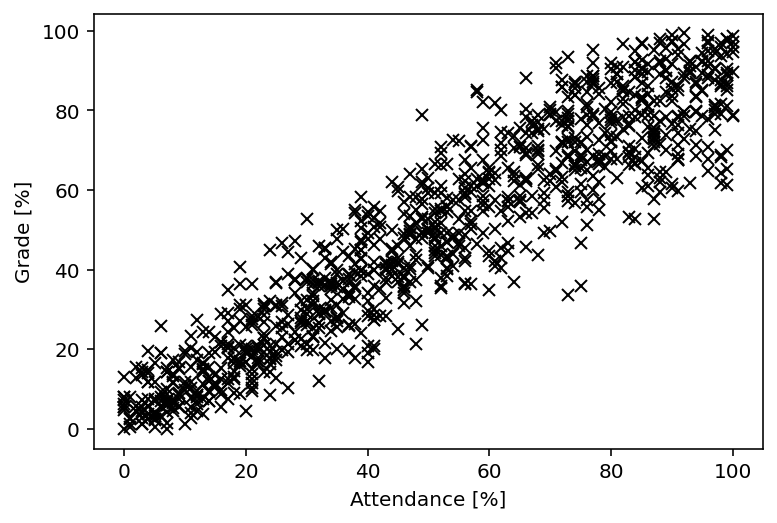

In [7]:
fig, ax = plt.subplots(dpi=144)
ax.plot(df['attendance'], df['overallgrade'], 'kx')
ax.set_xlabel('Attendance [%]')
ax.set_ylabel('Grade [%]')
plt.show()

In [15]:
df.to_csv('student_grades.csv')
df[['names']].to_csv('student_names.csv')
df[['overallgrade']].to_csv('student_overall.csv')
df[[f'assignment{i + 1}' for i in range(nassignments)]].to_csv('student_assignments.csv')
df[['attendance']].to_csv('student_attendance.csv')